In [1]:
#import the requred libraries
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Iris.csv',index_col='Id')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
df['Species']=le.fit_transform(df['Species'])

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [9]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
new_df=df.iloc[:,:-1]

In [11]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [12]:
new_df.shape

(150, 4)

In [14]:
from sklearn.cluster import KMeans

In [16]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)  # k-means ++ is to initialize the centroid
    kmeans.fit(new_df)
    wcss.append(kmeans.inertia_) # to calculate wcss attribute
    

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

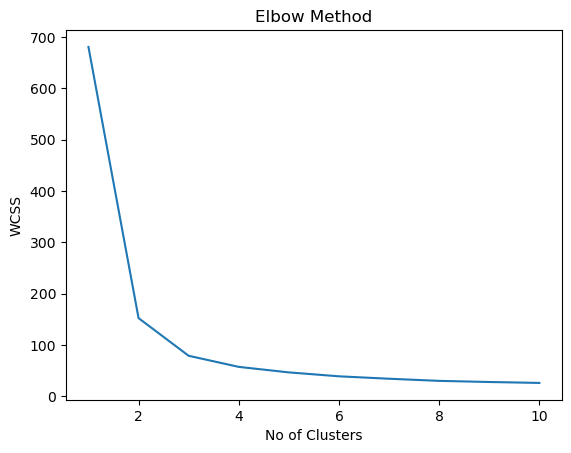

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

In [18]:
km_model=KMeans(n_clusters=3,init='k-means++', random_state=0)

In [19]:
ykmeans=km_model.fit_predict(new_df)

In [20]:
ykmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [21]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [22]:
new_df['Category']=pd.Series(ykmeans)

In [23]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Category
Id,,,,,
1,5.1,3.5,1.4,0.2,1.0
2,4.9,3.0,1.4,0.2,1.0
3,4.7,3.2,1.3,0.2,1.0
4,4.6,3.1,1.5,0.2,1.0
5,5.0,3.6,1.4,0.2,1.0


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Category       149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


In [25]:
new_df['Category'].unique()

array([ 1.,  0.,  2., nan])

In [26]:
new_df['Category'].mode()

0    0.0
Name: Category, dtype: float64

In [27]:
new_df['Category'].fillna(new_df['Category'].mode()[0],inplace=True)

In [28]:
new_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Category         0
dtype: int64

In [32]:
new_df['Category']=new_df['Category'].astype('int32')

In [33]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Category
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [35]:
new_df['Category'].value_counts()

0    63
1    49
2    38
Name: Category, dtype: int64